In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data into the dataframe
dataset = pd.read_csv("heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [6]:
column_name = "age"
column_sum = dataset[column_name].min()
print(column_sum)

29


In [7]:
#If we want to know all column mean,std,max,min values etc.
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Checking the categories of data and summary of data statistics

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina",
        "oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy","thall: 1 = normal; 2 = fixed defect; 3 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trtbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalachh:		 maximum heart rate achieved
exng:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slp:		the slope of the peak exercise ST segment
caa:		number of major vessels (0-3) colored by flourosopy
thall:		thall: 1 = normal; 2 = fixed defect; 3 = reversable defect


In [10]:
dataset["output"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: output, dtype: float64

In [11]:
dataset["output"].unique()

array([1, 0], dtype=int64)

In [12]:
print(dataset.corr())

               age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

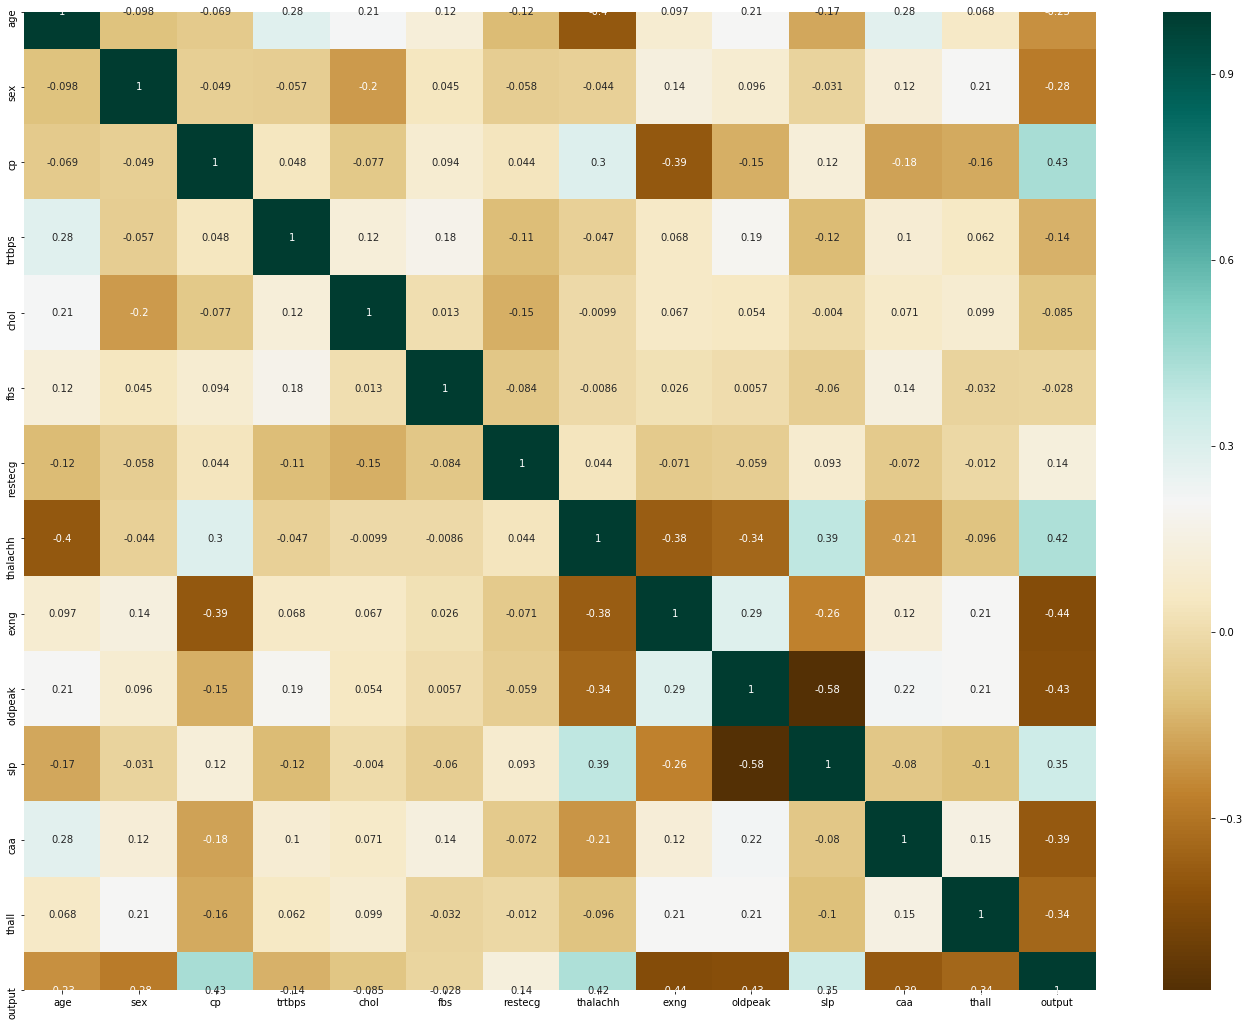

In [13]:
#HEAT MAP
corr_matrix = dataset.corr()
plt.figure(figsize=(24,18))
sns.heatmap(corr_matrix, annot=True, cmap="BrBG")
import matplotlib.pyplot as plt
plt.savefig('image.png')

1    165
0    138
Name: output, dtype: int64


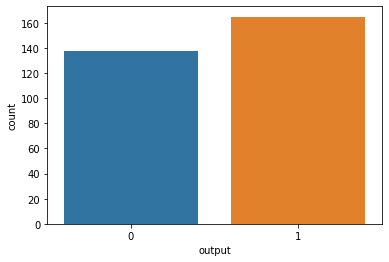

In [14]:
#counting how many of having with heart problem and without heart problem
# 1 means with heart problem 
# 0 means without heart problem
y = dataset["output"]
sns.countplot(y)
target_temp = dataset.output.value_counts()
print(target_temp)

In [15]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


In [16]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

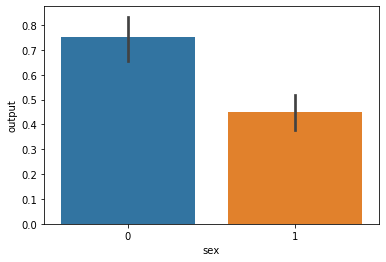

In [17]:
sns.barplot(dataset["sex"],y)

In [18]:
#we observe that, females are more likely to have heart problems than males

In [19]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

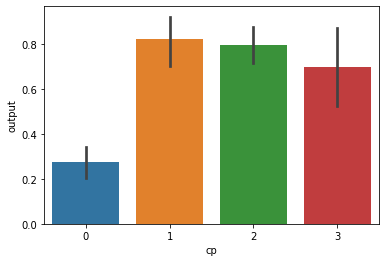

In [20]:
sns.barplot(dataset["cp"],y)

In [21]:
#We observe that, chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

In [22]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [23]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

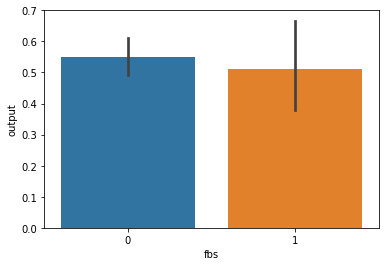

In [24]:
sns.barplot(dataset["fbs"],y)

In [25]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

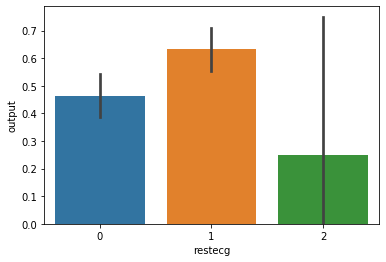

In [26]:
sns.barplot(dataset["restecg"],y)

In [27]:
#We realize that, people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

In [28]:
dataset["exng"].unique()

array([0, 1], dtype=int64)

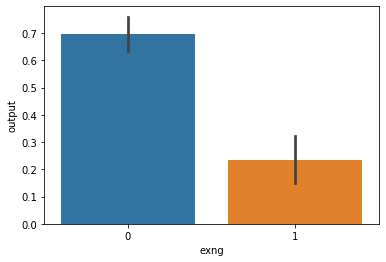

In [29]:
sns.barplot(dataset["exng"],y)

In [30]:
#People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

In [31]:
dataset["slp"].unique()

array([0, 2, 1], dtype=int64)

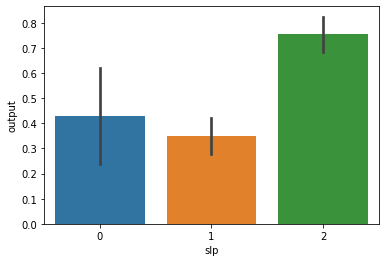

In [32]:
sns.barplot(dataset["slp"],y)

In [33]:
#We observe that, slope '2' causes heart pain much more than Slope '0' and '1'

In [34]:
dataset["caa"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

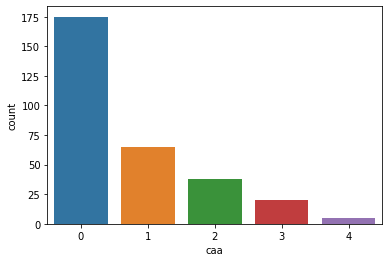

In [35]:
sns.countplot(dataset["caa"])

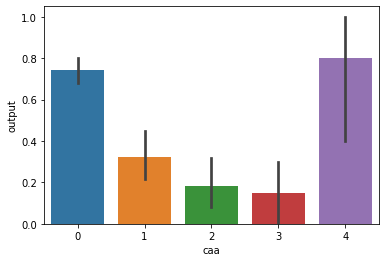

In [36]:
sns.barplot(dataset["caa"],y)

In [37]:
#caa=4 has astonishingly large number of heart patients

In [38]:
dataset["thall"].unique()

array([1, 2, 3, 0], dtype=int64)

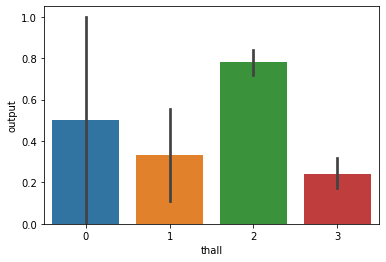

In [39]:
sns.barplot(dataset["thall"],y)

In [123]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

predictors = dataset.drop("output",axis=1)
#print(predictors)---> drops the output column and prints remaining columns
target = dataset["output"]
#print(target)----> only gives the output column
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.2,random_state=0)

In [124]:
X_train.shape

(242, 13)

In [125]:
X_test.shape

(61, 13)

In [126]:
Y_train.shape

(242,)

In [127]:
Y_test.shape

(61,)

In [128]:
#MODEL FITTING

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [130]:
#LOGISTIC REGRESSION

In [131]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(X_train,Y_train)

Y_predictor_logreg=logreg.predict(X_test)

In [132]:
print(X_test)
print(Y_predictor_logreg)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
225   70    1   0     145   174    0        1       125     1      2.6    0   
152   64    1   3     170   227    0        0       155     0      0.6    1   
228   59    1   3     170   288    0        0       159     0      0.2    1   
201   60    1   0     125   258    0        0       141     1      2.8    1   
52    62    1   2     130   231    0        1       146     0      1.8    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
146   44    0   2     118   242    0        1       149     0      0.3    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   
26    59    1   2     150   212    1        1       157     0      1.6    2   
108   50    0   1     120   244    0        1       162     0      1.1    2   
89    58    0   0     100   248    0        0       122     0      1.0    1   

     caa  thall  
225    0      3  
152    0      3

In [133]:
cm = confusion_matrix(Y_test, Y_predictor_logreg)  
print(cm)

[[22  5]
 [ 4 30]]


In [134]:
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]
print("FOR LOGISTIC REGRESSION")
Acc=round(((TP+TN)/(TP+TN+FP+FN))*100,2)
print("Correct Prediction Accuracy: "+str(Acc)+" %")
InAcc=round(((FP+FN)/(TP+TN+FP+FN))*100,2)
print("Incorrect Prediction Accuracy: "+str(InAcc)+" %")
sen=TP/(TP+FN)
print("Sensitivity:",round(sen,2))
spe=TN/(TN+FP)
print("Specificity:",round(spe,2))
prec=TP/(TP+FP)
print("Precision:",round(prec,2))

FOR LOGISTIC REGRESSION
Correct Prediction Accuracy: 85.25 %
Incorrect Prediction Accuracy: 14.75 %
Sensitivity: 0.88
Specificity: 0.81
Precision: 0.86


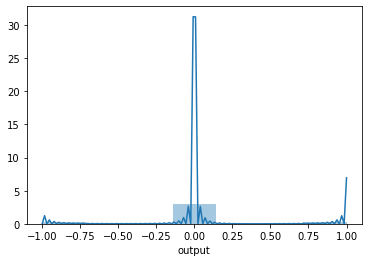

In [135]:
sns.distplot(Y_test-Y_predictor_logreg)

In [136]:
#NAIVE BAYES

In [137]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(X_train,Y_train)

Y_predictor_nb = NB.predict(X_test)

In [138]:
print(X_test)
print(Y_predictor_nb)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
225   70    1   0     145   174    0        1       125     1      2.6    0   
152   64    1   3     170   227    0        0       155     0      0.6    1   
228   59    1   3     170   288    0        0       159     0      0.2    1   
201   60    1   0     125   258    0        0       141     1      2.8    1   
52    62    1   2     130   231    0        1       146     0      1.8    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
146   44    0   2     118   242    0        1       149     0      0.3    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   
26    59    1   2     150   212    1        1       157     0      1.6    2   
108   50    0   1     120   244    0        1       162     0      1.1    2   
89    58    0   0     100   248    0        0       122     0      1.0    1   

     caa  thall  
225    0      3  
152    0      3

In [139]:
cm1 = confusion_matrix(Y_test, Y_predictor_nb)  
print(cm1)

[[21  6]
 [ 3 31]]


In [140]:
TN=cm1[0][0]
FP=cm1[0][1]
FN=cm1[1][0]
TP=cm1[1][1]
print("FOR Naive Bayes")
Acc=round(((TP+TN)/(TP+TN+FP+FN))*100,2)
print("Correct Prediction Accuracy: "+str(Acc)+" %")
InAcc=round(((FP+FN)/(TP+TN+FP+FN))*100,2)
print("Incorrect Prediction Accuracy: "+str(InAcc)+" %")
sen=TP/(TP+FN)
print("Sensitivity:",round(sen,2))
spe=TN/(TN+FP)
print("Specificity:",round(spe,2))
prec=TP/(TP+FP)
print("Precision:",round(prec,2))

FOR Naive Bayes
Correct Prediction Accuracy: 85.25 %
Incorrect Prediction Accuracy: 14.75 %
Sensitivity: 0.91
Specificity: 0.78
Precision: 0.84


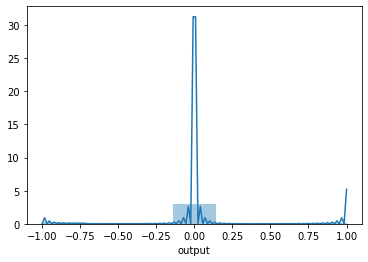

In [141]:
sns.distplot(Y_test-Y_predictor_nb)

In [142]:
#SUPPORT VECTOR MACHINE

In [143]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [144]:
print(X_test)
print(Y_pred_svm)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
225   70    1   0     145   174    0        1       125     1      2.6    0   
152   64    1   3     170   227    0        0       155     0      0.6    1   
228   59    1   3     170   288    0        0       159     0      0.2    1   
201   60    1   0     125   258    0        0       141     1      2.8    1   
52    62    1   2     130   231    0        1       146     0      1.8    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
146   44    0   2     118   242    0        1       149     0      0.3    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   
26    59    1   2     150   212    1        1       157     0      1.6    2   
108   50    0   1     120   244    0        1       162     0      1.1    2   
89    58    0   0     100   248    0        0       122     0      1.0    1   

     caa  thall  
225    0      3  
152    0      3

In [145]:
cm2 = confusion_matrix(Y_test, Y_pred_svm)  
print(cm2)

[[20  7]
 [ 4 30]]


In [146]:
TN=cm2[0][0]
FP=cm2[0][1]
FN=cm2[1][0]
TP=cm2[1][1]
print("FOR Support Vector Machine")
Acc=round(((TP+TN)/(TP+TN+FP+FN))*100,2)
print("Correct Prediction Accuracy: "+str(Acc)+" %")
InAcc=round(((FP+FN)/(TP+TN+FP+FN))*100,2)
print("Incorrect Prediction Accuracy: "+str(InAcc)+" %")
sen=TP/(TP+FN)
print("Sensitivity:",round(sen,2))
spe=TN/(TN+FP)
print("Specificity:",round(spe,2))
prec=TP/(TP+FP)
print("Precision:",round(prec,2))

FOR Support Vector Machine
Correct Prediction Accuracy: 81.97 %
Incorrect Prediction Accuracy: 18.03 %
Sensitivity: 0.88
Specificity: 0.74
Precision: 0.81


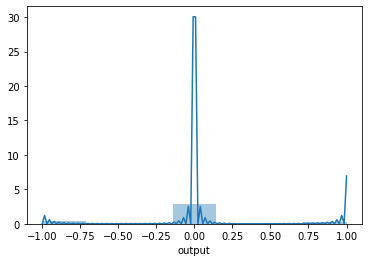

In [147]:
sns.distplot(Y_test-Y_pred_svm)

In [148]:
#RANDOM FOREST

In [153]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(10):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [155]:
print(X_test)
print(Y_pred_rf)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
225   70    1   0     145   174    0        1       125     1      2.6    0   
152   64    1   3     170   227    0        0       155     0      0.6    1   
228   59    1   3     170   288    0        0       159     0      0.2    1   
201   60    1   0     125   258    0        0       141     1      2.8    1   
52    62    1   2     130   231    0        1       146     0      1.8    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
146   44    0   2     118   242    0        1       149     0      0.3    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   
26    59    1   2     150   212    1        1       157     0      1.6    2   
108   50    0   1     120   244    0        1       162     0      1.1    2   
89    58    0   0     100   248    0        0       122     0      1.0    1   

     caa  thall  
225    0      3  
152    0      3

In [156]:
cm3= confusion_matrix(Y_test, Y_pred_rf)  
print(cm3)

[[24  3]
 [ 4 30]]


In [157]:
TN=cm3[0][0]
FP=cm3[0][1]
FN=cm3[1][0]
TP=cm3[1][1]
print("FOR Random Forest algorithm")
Acc=round(((TP+TN)/(TP+TN+FP+FN))*100,2)
print("Correct Prediction Accuracy: "+str(Acc)+" %")
InAcc=round(((FP+FN)/(TP+TN+FP+FN))*100,2)
print("Incorrect Prediction Accuracy: "+str(InAcc)+" %")
sen=TP/(TP+FN)
print("Sensitivity:",round(sen,2))
spe=TN/(TN+FP)
print("Specificity:",round(spe,2))
prec=TP/(TP+FP)
print("Precision:",round(prec,2))

FOR Random Forest algorithm
Correct Prediction Accuracy: 88.52 %
Incorrect Prediction Accuracy: 11.48 %
Sensitivity: 0.88
Specificity: 0.89
Precision: 0.91


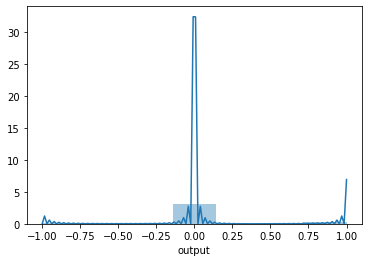

In [158]:
sns.distplot((Y_test-Y_pred_rf))

In [159]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,Y_train) 
Y_pred_knn = knn.predict(X_test)

In [160]:
print(X_test)
print(Y_pred_knn)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
225   70    1   0     145   174    0        1       125     1      2.6    0   
152   64    1   3     170   227    0        0       155     0      0.6    1   
228   59    1   3     170   288    0        0       159     0      0.2    1   
201   60    1   0     125   258    0        0       141     1      2.8    1   
52    62    1   2     130   231    0        1       146     0      1.8    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
146   44    0   2     118   242    0        1       149     0      0.3    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   
26    59    1   2     150   212    1        1       157     0      1.6    2   
108   50    0   1     120   244    0        1       162     0      1.1    2   
89    58    0   0     100   248    0        0       122     0      1.0    1   

     caa  thall  
225    0      3  
152    0      3

In [161]:
cm4= confusion_matrix(Y_test, Y_pred_knn)  
print(cm4)

[[19  8]
 [10 24]]


In [162]:
TN=cm4[0][0]
FP=cm4[0][1]
FN=cm4[1][0]
TP=cm4[1][1]
print("For K-Nearest Neighbor")
Acc=round(((TP+TN)/(TP+TN+FP+FN))*100,2)
print("Correct Prediction Accuracy: "+str(Acc)+" %")
InAcc=round(((FP+FN)/(TP+TN+FP+FN))*100,2)
print("Incorrect Prediction Accuracy: "+str(InAcc)+" %")
sen=TP/(TP+FN)
print("Sensitivity:",round(sen,2))
spe=TN/(TN+FP)
print("Specificity:",round(spe,2))
prec=TP/(TP+FP)
print("Precision:",round(prec,2))

For K-Nearest Neighbor
Correct Prediction Accuracy: 70.49 %
Incorrect Prediction Accuracy: 29.51 %
Sensitivity: 0.71
Specificity: 0.7
Precision: 0.75


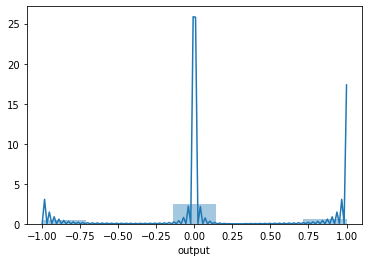

In [163]:
sns.distplot((Y_test-Y_pred_knn))

In [164]:
Names=["Logistic Regression","Naive Bayes","Support Vector Machine","Random Forest","K-Nearest Neighbor"]
Accuracy=[85.2,85.2,81.97,88.52,70.49]
Inaccuracy=[14.75,14.75,18.03,11.48,29.51]
Sensitivity=[0.88,0.91,0.88,0.88,0.71]
Specificity=[0.81,0.78,0.74,0.89,0.70]
Precision=[0.86,0.84,0.81,0.91,0.75]

In [165]:
df = pd.DataFrame()
df['Algorithm_Names'] = Names
df['Accuracy'] = Accuracy
df['Inaccuracy']=Inaccuracy
df['Sensitivity']=Sensitivity
df['Specificity']=Specificity
df['Precision']=Precision
df

,Algorithm_Names,Accuracy,Inaccuracy,Sensitivity,Specificity,Precision
0,Logistic Regression,85.20,14.75,0.88,0.81,0.86
1,Naive Bayes,85.20,14.75,0.91,0.78,0.84
2,Support Vector Machine,81.97,18.03,0.88,0.74,0.81
3,Random Forest,88.52,11.48,0.88,0.89,0.91
4,K-Nearest Neighbor,70.49,29.51,0.71,0.70,0.75


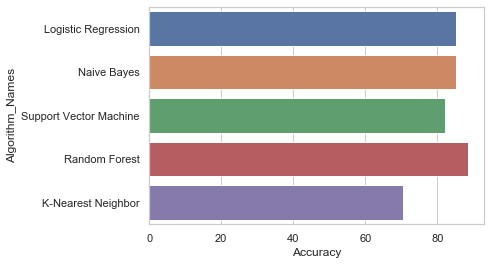

In [166]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm_Names", x="Accuracy", data=df)

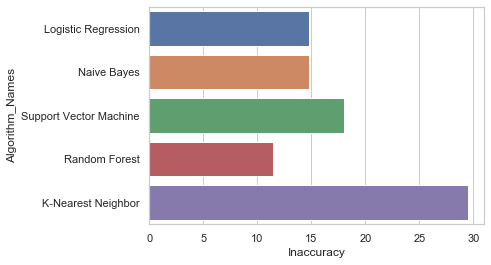

In [167]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm_Names", x="Inaccuracy", data=df)

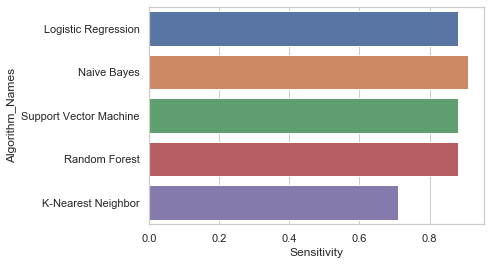

In [168]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm_Names", x="Sensitivity", data=df)

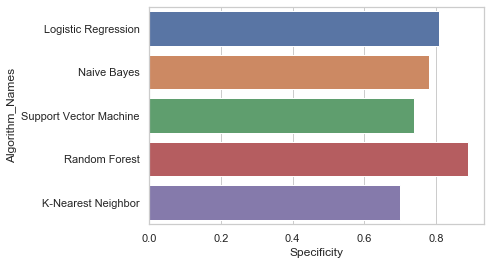

In [169]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm_Names", x="Specificity", data=df)

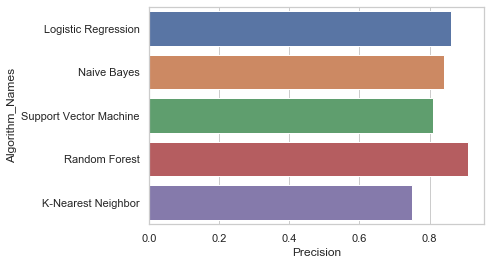

In [170]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm_Names", x="Precision", data=df)

In [171]:
#Now the graph shows Random forest is the best accuracy algorithm, so we try for the future values

y_future = rf.predict([[70,1,0,145,174,0,1,125,1,2.6,0,0,3]]) 
print(*y_future)
if(y_future==1):
    print("You are affected....","\U0001F62D")
else:
    print("You are safe...","\U0001f600")

0
You are safe... 😀


In [174]:

y_future = rf.predict([[58,0,0,100,248,0,0,122,0,1.0,1,0,2]])
print(*y_future)
if(y_future==1):
    print("You are affected....","\U0001F62D")
else:
    print("You are safe...","\U0001f600")

1
You are affected.... 😭
